# Analitica de Datos / Yessica Alejandra Gomez Rivera codigo: 817073

**Construyendo un proyecto de aprendizaje de máquina**

*Códigos referencia del libro Hands-On Machine Learning with Scikit-Learn and Tensor Flow 2017 (Cap 2) -- Aurélien Géron

In [ ]:
#cargar datos desde drive acceso libre
FILEID = "1TCB4gY_3anL_Yel2SJm2vAtWUC-5VlP5"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir

--2020-11-03 16:50:23--  https://docs.google.com/uc?export=download&confirm=&id=1TCB4gY_3anL_Yel2SJm2vAtWUC-5VlP5
Resolving docs.google.com (docs.google.com)... 64.233.189.100, 64.233.189.102, 64.233.189.101, ...
Connecting to docs.google.com (docs.google.com)|64.233.189.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-6s-docs.googleusercontent.com/docs/securesc/6ppaashd0dkncv3evuc9aiv4p081eocr/57m7f17bnev5peilmdb5mu5qbl4etd77/1604422200000/07414455255309107998/16211747362748068440Z/1TCB4gY_3anL_Yel2SJm2vAtWUC-5VlP5?e=download [following]
--2020-11-03 16:50:24--  https://doc-04-6s-docs.googleusercontent.com/docs/securesc/6ppaashd0dkncv3evuc9aiv4p081eocr/57m7f17bnev5peilmdb5mu5qbl4etd77/1604422200000/07414455255309107998/16211747362748068440Z/1TCB4gY_3anL_Yel2SJm2vAtWUC-5VlP5?e=download
Resolving doc-04-6s-docs.googleusercontent.com (doc-04-6s-docs.googleusercontent.com)... 108.177.97.132, 2404:6800:4008:c00::84
Connecting to 

*El cliente es una compañia de seguros que ha brindado seguros medicos a sus clientes, ahora vende seguros para vehiculos y quiere predecir cuantos de sus clientes del año pasado, quieren comprar el seguro este año.*

# Problema a resolver

*Objetivo: predecir si los clientes asegurados del año pasado estan interesados en el seguro de vehiculosprovisto por la compañia.*

*Insumos: Características de los clientes*

**Preparar modulos principales, funciones inline, paths para guardar archivos y figuras:**

In [ ]:
#Lectura y quitar casillas que no me aporten información.
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objs as go

from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
# magic function to render figure
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#crear carpeta con resultados
import os
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")


#Lectura de Base de datos
segurated = pd.read_csv('train.csv') 

col_drop = ['id']
segurated.drop(columns = col_drop, inplace = True)
segurated.head(10)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [ ]:
segurated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                399 non-null    object 
 1   Age                   399 non-null    int64  
 2   Driving_License       399 non-null    int64  
 3   Region_Code           399 non-null    float64
 4   Previously_Insured    399 non-null    int64  
 5   Vehicle_Age           399 non-null    object 
 6   Vehicle_Damage        399 non-null    object 
 7   Annual_Premium        399 non-null    float64
 8   Policy_Sales_Channel  399 non-null    float64
 9   Vintage               399 non-null    int64  
 10  Response              399 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 34.4+ KB


# Análisis exploratorio básico

In [ ]:
segurated["Response"].value_counts() #conteo de los valores en una característica

0    355
1     44
Name: Response, dtype: int64

In [ ]:
segurated.describe() # estadística básica de las variables

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,399.000000,399.0,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,38.025063,1.0,26.558897,0.451128,31408.408521,115.493734,154.388471,0.110276
std,15.645552,0.0,12.810796,0.498231,16299.010709,52.806886,81.911442,0.313626
min,20.000000,1.0,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,24.000000,1.0,15.000000,0.000000,25578.500000,122.000000,83.000000,0.000000
50%,34.000000,1.0,28.000000,0.000000,32883.000000,152.000000,152.000000,0.000000
75%,49.000000,1.0,35.000000,1.000000,40562.000000,152.000000,225.000000,0.000000
max,79.000000,1.0,50.000000,1.000000,101021.000000,163.000000,299.000000,1.000000


In [ ]:
segurated["Response"].describe() # estadística básica de las variable de interés

count    399.000000
mean       0.110276
std        0.313626
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Response, dtype: float64

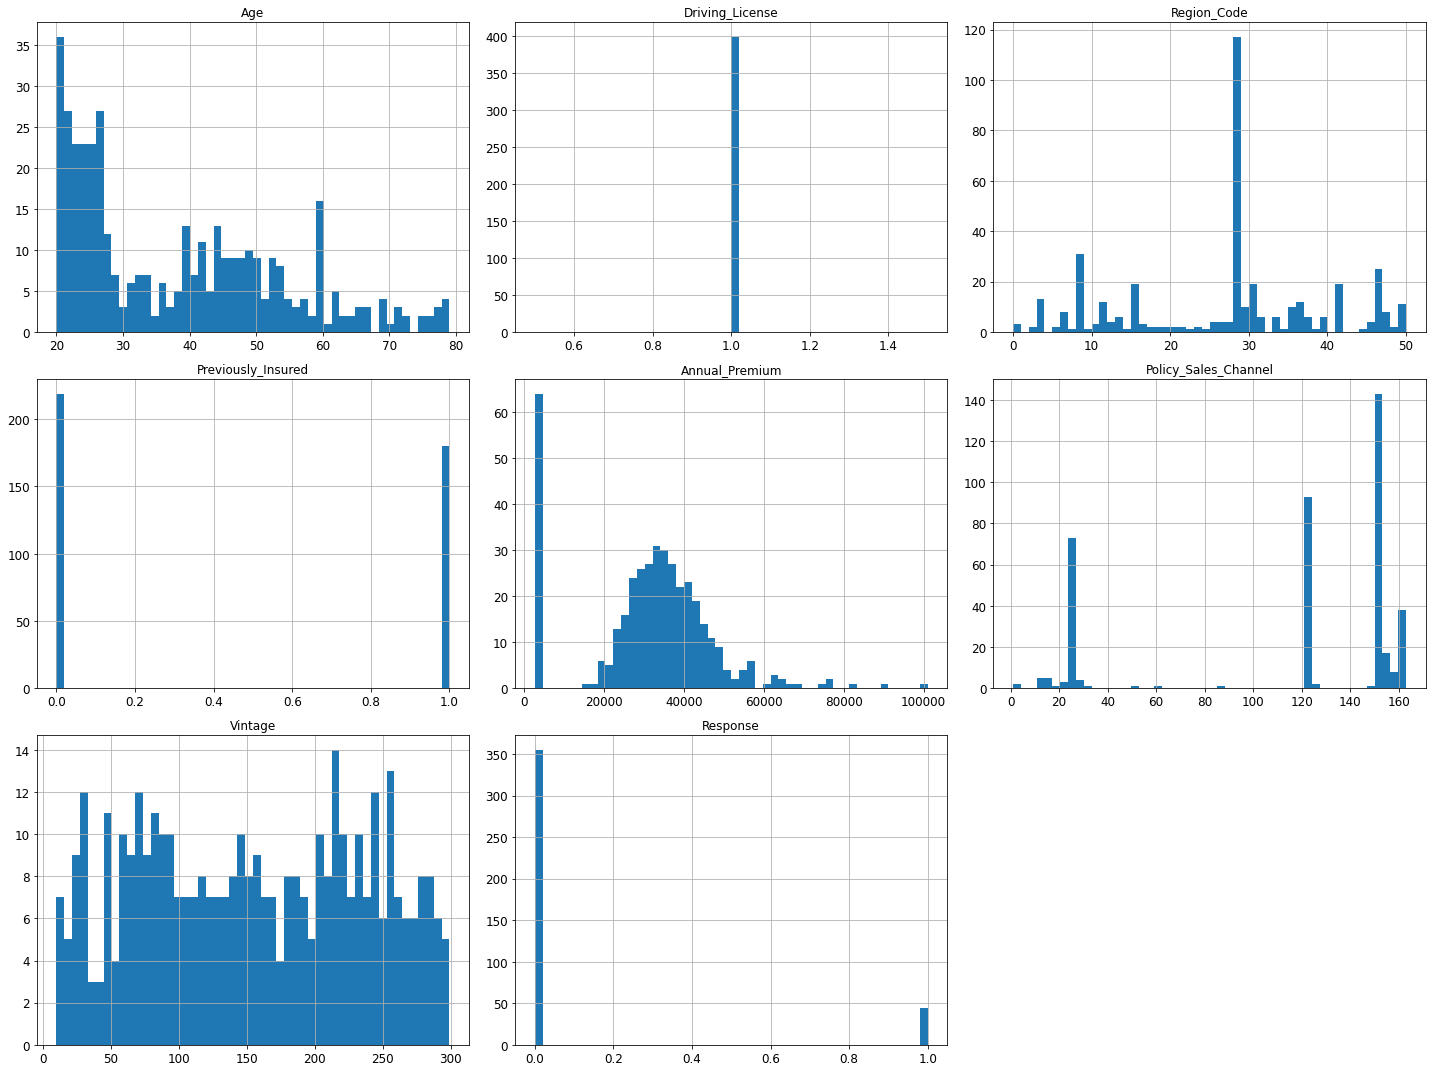

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
segurated.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.savefig('results/attribute_histogram_plots.pdf', format='pdf', dpi=300)
plt.show()

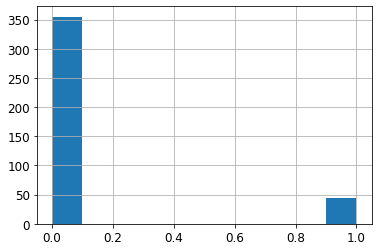

In [44]:
segurated["Response"].hist()
plt.savefig('results/response_plots.pdf', format='pdf', dpi=300)


# Preparar datos (validación y análisis exploratorio por visualización)

In [ ]:
#Paso 2: Particion entrenamiento y validacion
# Tamaño Xtrain 70%, Tamaño Xtest 30%
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
Xtrain, Xtest = train_test_split(segurated,test_size=0.3)
col_sal = "Response"
ytrain = Xtrain[col_sal]
ytest = Xtest[col_sal]
Xtrain.drop(columns=col_sal,inplace=True)
Xtest.drop(columns=col_sal,inplace=True)

In [ ]:
Xtrain.head(10)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
157,Male,41,1,35.0,0,1-2 Year,Yes,25112.0,154.0,221
109,Male,45,1,35.0,0,1-2 Year,Yes,2630.0,124.0,275
17,Female,25,1,35.0,1,< 1 Year,No,46622.0,152.0,299
253,Male,36,1,28.0,1,1-2 Year,No,47682.0,124.0,121
24,Male,34,1,15.0,1,1-2 Year,No,38111.0,152.0,180
362,Female,50,1,28.0,0,1-2 Year,Yes,68147.0,30.0,218
350,Male,46,1,29.0,0,1-2 Year,Yes,28946.0,124.0,64
393,Female,49,1,29.0,0,1-2 Year,No,2630.0,156.0,265
380,Male,47,1,28.0,1,1-2 Year,No,31269.0,124.0,213
384,Male,26,1,8.0,1,< 1 Year,No,54203.0,152.0,81


In [ ]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 157 to 102
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                279 non-null    object 
 1   Age                   279 non-null    int64  
 2   Driving_License       279 non-null    int64  
 3   Region_Code           279 non-null    float64
 4   Previously_Insured    279 non-null    int64  
 5   Vehicle_Age           279 non-null    object 
 6   Vehicle_Damage        279 non-null    object 
 7   Annual_Premium        279 non-null    float64
 8   Policy_Sales_Channel  279 non-null    float64
 9   Vintage               279 non-null    int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 24.0+ KB


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OrdinalEncoder
class dummy_sgt(BaseEstimator,TransformerMixin):
    #inicializacion de clase y varaibles
    def __init__(self,cat_usr): #constructor clase
        self.cat_usr = cat_usr #lista de atributos categoricos

    def fit(self,X, *_):
        Xi = X.copy() #copiar dataset para no reemplazar original
        self.imputer_num = SimpleImputer(strategy="most_frequent") #crear imputador tipo modo
        self.a = Xi.columns[np.sum(Xi.isna())> 0] #encontrar columnas con datos faltantes
        if len(self.a) > 0:
          self.imputer_num.fit(Xi[self.a]) # ajustar imputador
          Xi[self.a] = self.imputer_num.transform(Xi[self.a]) #evaluar  sobre datos imputador
        

        Xi['Vehicle_Age'] = Xi['Vehicle_Age'].replace(regex=['>','<','-','Year','s'], value=['','','','',''])
        Xi['Vehicle_Age'] = Xi['Vehicle_Age'].replace(regex=['12'], value=['2'])
        Xi['Vehicle_Age'] = Xi['Vehicle_Age'].astype('float64')

        
        cat = [] #codificar variables categoricas con ordinal encoder
        for i in self.cat_usr.keys():
            cat = cat + [[*self.cat_usr.get(i)]]
        self.col_cat_usr = OrdinalEncoder(categories=cat)
        Xi[[*self.cat_usr.keys()]] =self.col_cat_usr.fit_transform(Xi[[*self.cat_usr.keys()]])

        return self    

    def transform(self, X, *_):#funcion transformador
        Xi = X.copy()
        if len(self.a) > 0:
          Xi[self.a] = self.imputer_num.transform(Xi[self.a])
        
        Xi['Vehicle_Age'] = Xi['Vehicle_Age'].replace(regex=['>','<','-','Year','s'], value=['','','','',''])
        Xi['Vehicle_Age'] = Xi['Vehicle_Age'].replace(regex=['12'], value=['2'])
        Xi['Vehicle_Age'] = Xi['Vehicle_Age'].astype('float64')
        

        
        Xi[[*self.cat_usr.keys()]] =self.col_cat_usr.transform(Xi[[*self.cat_usr.keys()]])
        return Xi
    
    def fit_transform(self,X,*_):
        self.fit(X)
        return self.transform(X)

In [ ]:
cat = ['Gender','Vehicle_Damage']
items = [] 
for i in cat:
    items += [list(segurated[i].value_counts().index)]# ['Alto','Medio','Bajo']
cat_usr = dict(zip(cat, items))

In [ ]:
dummy = dummy_sgt(cat_usr = cat_usr)
Xtrain_pre = dummy.fit_transform(Xtrain)

In [ ]:
Xtrain_pre

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
157,0.0,41,1,35.0,0,2.0,1.0,25112.0,154.0,221
109,0.0,45,1,35.0,0,2.0,1.0,2630.0,124.0,275
17,1.0,25,1,35.0,1,1.0,0.0,46622.0,152.0,299
253,0.0,36,1,28.0,1,2.0,0.0,47682.0,124.0,121
24,0.0,34,1,15.0,1,2.0,0.0,38111.0,152.0,180
...,...,...,...,...,...,...,...,...,...,...
71,1.0,27,1,11.0,0,1.0,1.0,34587.0,26.0,63
106,1.0,23,1,41.0,1,1.0,0.0,36674.0,152.0,158
270,0.0,62,1,8.0,0,2.0,1.0,47272.0,26.0,194
348,1.0,31,1,28.0,0,2.0,1.0,39423.0,124.0,190


In [ ]:
Xtrain_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 157 to 102
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                279 non-null    float64
 1   Age                   279 non-null    int64  
 2   Driving_License       279 non-null    int64  
 3   Region_Code           279 non-null    float64
 4   Previously_Insured    279 non-null    int64  
 5   Vehicle_Age           279 non-null    float64
 6   Vehicle_Damage        279 non-null    float64
 7   Annual_Premium        279 non-null    float64
 8   Policy_Sales_Channel  279 non-null    float64
 9   Vintage               279 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 24.0 KB


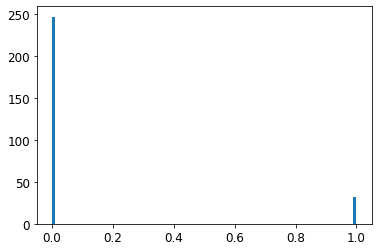

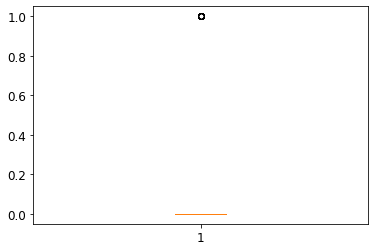

In [45]:
import matplotlib.pyplot as plt
plt.hist(ytrain,bins = 100)
plt.show()
plt.savefig('results/boxplot_ytrain.pdf', format='pdf', dpi=300)
plt.boxplot(ytrain)
plt.show()

In [ ]:
corr_matrix =Xtrain_pre.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
Gender,1.000000,-0.178947,nan,0.156732,-0.072460,-0.134942,0.057131,-0.074955,0.082282,0.059677
Age,-0.178947,1.000000,nan,0.038016,-0.287863,0.803621,0.260180,0.059129,-0.550823,-0.094692
Driving_License,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Region_Code,0.156732,0.038016,nan,1.000000,-0.034328,0.019328,0.037174,-0.058849,-0.056355,0.031212
Previously_Insured,-0.072460,-0.287863,nan,-0.034328,1.000000,-0.405693,-0.853393,-0.033226,0.221756,-0.032972
Vehicle_Age,-0.134942,0.803621,nan,0.019328,-0.405693,1.000000,0.374182,-0.002958,-0.559959,-0.037377
Vehicle_Damage,0.057131,0.260180,nan,0.037174,-0.853393,0.374182,1.000000,0.054521,-0.188357,0.015771
Annual_Premium,-0.074955,0.059129,nan,-0.058849,-0.033226,-0.002958,0.054521,1.000000,0.004859,-0.098684
Policy_Sales_Channel,0.082282,-0.550823,nan,-0.056355,0.221756,-0.559959,-0.188357,0.004859,1.000000,0.064942
Vintage,0.059677,-0.094692,nan,0.031212,-0.032972,-0.037377,0.015771,-0.098684,0.064942,1.000000


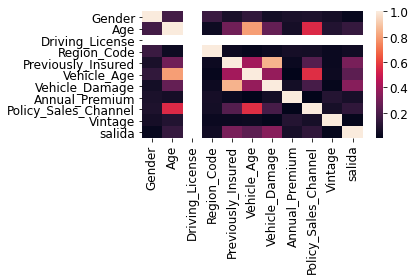

In [46]:
import seaborn as sns
sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns.values,yticklabels=corr_matrix.columns.values)
plt.tight_layout()
plt.savefig('results/matrix_corr_plots.pdf', format='pdf', dpi=300)
plt.show()

In [ ]:
Xtrain_pre_2= Xtrain_pre.copy()
Xtrain_pre_2['salida']=ytrain
corr_matrix =abs(Xtrain_pre_2.corr())
corr_matrix['salida'].sort_values(ascending= False)

salida                  1.000000
Vehicle_Damage          0.343539
Previously_Insured      0.308145
Vehicle_Age             0.241101
Age                     0.143837
Policy_Sales_Channel    0.130704
Annual_Premium          0.067164
Region_Code             0.048459
Gender                  0.024569
Vintage                 0.016804
Driving_License              NaN
Name: salida, dtype: float64

# Predicción variable de interés desde datos preprocesados

In [ ]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
sca = StandardScaler()
Xtrain_pre_i = sca.fit_transform(Xtrain_pre)

In [ ]:
Xtrain_pre_i.var(axis=0)

array([1., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
Xtrain_pre.var(axis=0)

Gender                  2.497357e-01
Age                     2.280112e+02
Driving_License         0.000000e+00
Region_Code             1.644593e+02
Previously_Insured      2.449395e-01
Vehicle_Age             2.491942e-01
Vehicle_Damage          2.503546e-01
Annual_Premium          2.829402e+08
Policy_Sales_Channel    2.721198e+03
Vintage                 6.975725e+03
dtype: float64

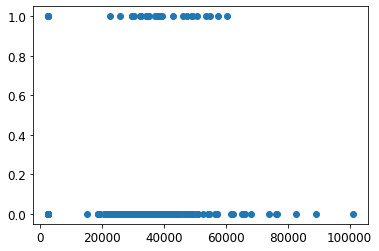

In [47]:
import matplotlib.pyplot as plt
plt.scatter(Xtrain_pre['Annual_Premium'],ytrain)
plt.savefig('results/annual_premium.pdf', format='pdf', dpi=300)


In [ ]:
red = PCA()
zz = red.fit_transform(Xtrain_pre_i)

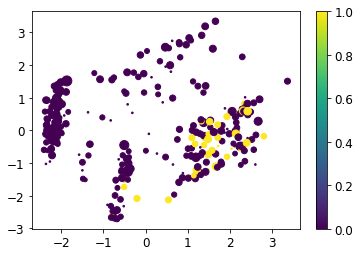

In [48]:
plt.scatter(zz[:,0],zz[:,1],c=ytrain,s = 100*Xtrain_pre['Annual_Premium']/(Xtrain_pre['Annual_Premium'].max()))
plt.colorbar()
plt.savefig('results/Red_PCA.pdf', format='pdf', dpi=300)
plt.show()

In [ ]:
# proceso con test
Xtest_pre = dummy.transform(Xtest)

In [ ]:
Xtest_pre['Annual_Premium']

198     2630.0
349    36638.0
33     43129.0
208    18576.0
93      2630.0
        ...   
60      2630.0
79     40651.0
284    34165.0
304    27771.0
277    41246.0
Name: Annual_Premium, Length: 120, dtype: float64

In [ ]:
Xtest_pre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 198 to 277
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                120 non-null    float64
 1   Age                   120 non-null    int64  
 2   Driving_License       120 non-null    int64  
 3   Region_Code           120 non-null    float64
 4   Previously_Insured    120 non-null    int64  
 5   Vehicle_Age           120 non-null    float64
 6   Vehicle_Damage        120 non-null    float64
 7   Annual_Premium        120 non-null    float64
 8   Policy_Sales_Channel  120 non-null    float64
 9   Vintage               120 non-null    int64  
dtypes: float64(6), int64(4)
memory usage: 10.3 KB


In [ ]:
#Xtest_pre_i = sca.transform(Xtest_pre) # standardizacion
#zztest = red.transform(Xtest_pre_i) # llevarlo a 2D con pca
zztest = red.transform(sca.transform(dummy.transform(Xtest))) # una sola linea

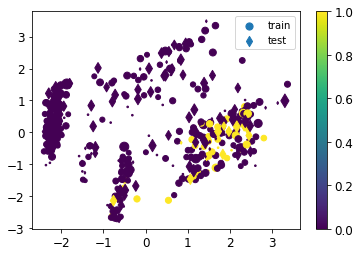

In [49]:
plt.scatter(zz[:,0],zz[:,1],c=ytrain,s = 100*Xtrain_pre['Annual_Premium']/(Xtrain_pre['Annual_Premium'].max()),label='train')
plt.colorbar()
plt.scatter(zztest[:,0],zztest[:,1],c=ytest,s=100*Xtest_pre['Annual_Premium']/Xtest_pre['Annual_Premium'].max(),marker='d',label='test')
plt.legend()
plt.savefig('results/2dPCA.pdf', format='pdf', dpi=300)
plt.show()

# Modelos de Predicción


#  Linear Regression

Modelo matemático : 
$Y = mX + b$

Donde Y es el resultado, $X$ es la variable, $m$ la pendiente (o coeficiente) de la recta y $b$ la constante o también conocida como el “punto de corte con el eje $Y$” en la gráfica (cuando $X=0$)

*Recordemos que los algoritmos de Machine Learning Supervisados, aprenden por sí mismos y -en este caso- a obtener automáticamente esa “recta” que buscamos con la tendencia de predicción. Para hacerlo se mide el error con respecto a los puntos de entrada y el valor “Y” de salida real. El algoritmo deberá minimizar el coste de una función de error cuadrático y esos coeficientes corresponderán con la recta óptima. Hay diversos métodos para conseguir minimizar el coste. Lo más común es utilizar una versión vectorial y la llamada Ecuación Normal que nos dará un resultado directo.*




#  Regresión Rigde con Python y SKLearn

La Regresión Rigde, también denominada regresión contraída o Tikhonov regularization, regulariza el modelo resultante imponiendo una penalización al tamaño de los coeficientes de la relación lineal entre las características predictivas y la variable objetivo. En este caso, los coeficientes calculados minimizan la suma de los cuadrados de los residuos penalizada al añadir el cuadrado de la norma L2 del vector formado por los coeficientes:*texto en cursiva*

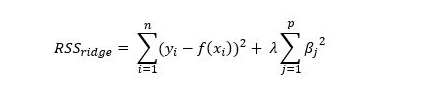















 



Donde $λ$ es un parámetro que controla el grado de penalización: cuanto mayor éste, los coeficientes serán menores resultando más robustos a la colinealidad. Cuando $α$ es igual a cero, Ridge es equivalente a la regresión lineal.

La norma $L2$ es equivalente a la distancia Euclidea del vector al centro de coordenadas, por lo que la penalización es proporcional a los cuadrados de los coeficientes. Por poner un ejemplo sencillo, si el vector de coordenadas es (2, 3) -supongamos que estamos trabajando solo con dos características predictivas-, la "norma 2" $(L2)$ de este vector sería la distancia del punto $(2, 3)$ a $(0, 0)$, es decir, la raíz cuadrada de $22 + 32$: $3.16$ aproximadamente. La penalización sería el cuadrado de este valor: $10$ (resultante de sumar los cuadrados de los coeficientes).

Nótese que el término de regularización solo se añade a la función de coste durante el entrenamiento: la evaluación del rendimiento del modelo se realiza considerando solo la función de coste sin regularizar.

# La regresion LASSO 
esta dada por:




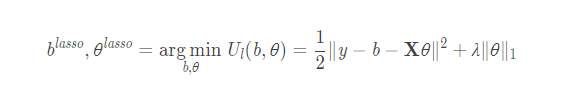


con el parámetro de complejidad $\lambda \ge 0λ≥0$ que controla el grado de encojimiento.


# Elastic Net
La regresión usando la penalización Red Elástica esta dada por:



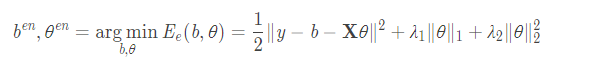

# Kernel ridge regression:

Combina la regresión y la clasificación de la cresta (mínimos cuadrados lineales con regularización de norma l2) con el truco del núcleo. De este modo, aprende una función lineal en el espacio inducida por el núcleo respectivo y los datos. Para los núcleos no lineales, esto corresponde a una función no lineal en el espacio original.


# Aplicación de los modelos 

In [ ]:
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.kernel_ridge import KernelRidge

steps = [
         [('scaler', StandardScaler()), #estandarizar cada atributo columna de xtrain centrada en 0 y var = 1
          ('reg', LinearRegression())],
         
         [('scaler',StandardScaler()),
          ('reg',ElasticNet())],
         
         [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
          ('reg',  KernelRidge())], 
         
         [('scaler', StandardScaler()), 
          ('reg',  Ridge())],  

         [('scaler', StandardScaler()), 
          ('reg',  Lasso())],
         ]        

#parametros a buscar por busqueda por grilla
parameters =[ 
             {'reg__fit_intercept':[True, False]             
             },
             {
              'reg__alpha': [0,1e-3,1e-2,1e-1,0.8,1], #parametros n_neighbors debe ser siempre un int
              'reg__l1_ratio':[0,0.25,0.5,0.75,1]
            },
             {
              'reg__alpha':[0,1e-3,1e-2,1e-1,1],
              'reg__gamma': [0,0.25,0.5,0.75,1]
             },
             {
              'reg__alpha':[0,1e-3,1e-2,1e-1,0.8,1],
              'reg__fit_intercept': [0,0.25,0.5,0.75,1]
             },
             {
              'reg__alpha':[0,1e-3,1e-2,1e-1,0.8,1],
              'reg__normalize': [0,0.25,0.5,0.75,1]
             }
              ]

label_model = ['Nor+RegLin','Nor+ElasticNet','Nor+KernelRidge','Nor+Ridge','Nor+Lasso']

In [ ]:
parameters

[{'reg__fit_intercept': [True, False]},
 {'reg__alpha': [0, 0.001, 0.01, 0.1, 0.8, 1],
  'reg__l1_ratio': [0, 0.25, 0.5, 0.75, 1]},
 {'reg__alpha': [0, 0.001, 0.01, 0.1, 1],
  'reg__gamma': [0, 0.25, 0.5, 0.75, 1]},
 {'reg__alpha': [0, 0.001, 0.01, 0.1, 0.8, 1],
  'reg__fit_intercept': [0, 0.25, 0.5, 0.75, 1]},
 {'reg__alpha': [0, 0.001, 0.01, 0.1, 0.8, 1],
  'reg__normalize': [0, 0.25, 0.5, 0.75, 1]}]

In [ ]:
import os
pathpre = 'datospre'

try:
  os.mkdir(pathpre)
except:
  print("Carpeta results ya existe")

In [ ]:
#valildacion cruzada anidada
from joblib import dump, load
from sklearn.metrics import mean_absolute_error as msa 
Niter = 10 #numero particiones outter loop nested cross-validation
msev =np.zeros((Niter,len(steps)))#arreglo para guardar acierto/error
Nmod = len(steps) #numero de modelos a probar
best_estimators = Niter*[None]#mejor metodo por iteracion
###clave del funcionamiento
best_hyperpar = Niter*[None]#mejor metodo por iteracion 


#############################
for j in range(Niter): #outter loop # SI TIENE MENOS DE 1000 DATOS BORRAR ESTE CICLO SOLO CV EN LINEA 16
      #print('it %d/%d'%(j+1,Niter))
      #particiono datos outter loop
      X_trainj, X_testj, y_trainj, y_testj = train_test_split(Xtrain_pre,ytrain,test_size=0.3) # xtrain 60, xtest 26
      list_est = [] #lista lazo interno para guardar mejor estimador por modelo para iteracion j
      list_hyper = [] #lista lazo interno para guardar mejores hyperparametros por modelo para iteracion j
      for r in range(Nmod): #recorro todos los posibles modelos a probar en iteracion j del outter loop
          grid_search = GridSearchCV(Pipeline(steps[r],memory=pathpre), parameters[r],cv=5,verbose=5,scoring='neg_mean_absolute_error') #cv inner loop
          #xtrain gridsearchcv xtrain split en 12 / cv, 60/5 = 12, xtrain 48 datos validar 12
          # cv = N -> leave one out N <30
          #generar mejor modelo
          grid_search.fit(X_trainj,y_trainj)
          #estimar salida conjunto de test
          y_pred = grid_search.best_estimator_.predict(X_testj)
          #guardar mejor modelo
          list_est.append(grid_search.best_estimator_)
          list_hyper.append(grid_search.best_params_)
          #guardar acierto
          msev[j,r] = msa(y_testj,y_pred)
          print('it %d/%d-Modelo %d/%d'%(j+1,Niter,r+1,len(steps)))
          print('best hyper', grid_search.best_params_)
          print('msa:',msev[j,r])
          
      best_estimators[j] = list_est #guardar mejores modelos 
      best_hyperpar[j] = list_hyper #mejores hyperparametros
          
      savedata = {
          'acc':msev,
          'best_models':best_estimators,
          'best_parameters':best_hyperpar,
            } 
      dump(savedata,'Seguros.joblib')

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] reg__fit_intercept=True .........................................
[CV] ............ reg__fit_intercept=True, score=-0.239, total=   0.0s
[CV] reg__fit_intercept=True .........................................
[CV] ............ reg__fit_intercept=True, score=-0.255, total=   0.0s
[CV] reg__fit_intercept=True .........................................
[CV] ............ reg__fit_intercept=True, score=-0.208, total=   0.0s
[CV] reg__fit_intercept=True .........................................
[CV] ............ reg__fit_intercept=True, score=-0.237, total=   0.0s
[CV] reg__fit_intercept=True .........................................
[CV] ............ reg__fit_intercept=True, score=-0.198, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.230, total=   0.0s
[CV] reg__fit_intercept=False ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


[CV] ........... reg__fit_intercept=False, score=-0.296, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.213, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.247, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.193, total=   0.0s
it 1/10-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.22708443209511658
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] reg__alpha=0, reg__l1_ratio=0 ...................................
[CV] ...... reg__alpha=0, reg__l1_ratio=0, score=-0.239, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0 ...................................
[CV] ...... reg__alpha=0, reg__l1_ratio=0, score=-0.255, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0 ...................................
[C

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] .... reg__alpha=0, reg__l1_ratio=0.5, score=-0.198, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.75 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.75, score=-0.239, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.75 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.75, score=-0.255, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.75 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.75, score=-0.208, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.75 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.75, score=-0.237, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.75 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.75, score=-0.198, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=1 ...................................
[CV] ...... reg__alpha=0, reg__l1_ratio=1, score=-0.239, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=1 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] ......... reg__alpha=0, reg__gamma=0, score=-0.215, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.25 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.25, score=-0.221, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.25 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.25, score=-0.296, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.25 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.25, score=-0.226, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.25 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.25, score=-0.233, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.25 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.25, score=-0.215, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.5 ....................................
[CV] ....... reg__alpha=0, reg__gamma=0.5, score=-0.221, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.5 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV]  reg__alpha=0, reg__fit_intercept=0.75, score=-0.237, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.75 ...........................
[CV]  reg__alpha=0, reg__fit_intercept=0.75, score=-0.198, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=1 ..............................
[CV] . reg__alpha=0, reg__fit_intercept=1, score=-0.239, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=1 ..............................
[CV] . reg__alpha=0, reg__fit_intercept=1, score=-0.255, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=1 ..............................
[CV] . reg__alpha=0, reg__fit_intercept=1, score=-0.208, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=1 ..............................
[CV] . reg__alpha=0, reg__fit_intercept=1, score=-0.237, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=1 ..............................
[CV] . reg__alpha=0, reg__fit_intercept=1, score=-0.198, total=   0.0s
[CV] reg__alpha=0.001, reg__fit_intercept=0 ..........................
[C

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] .. reg__alpha=0, reg__normalize=0.75, score=-0.237, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.75 ...............................
[CV] .. reg__alpha=0, reg__normalize=0.75, score=-0.198, total=   0.0s
[CV] reg__alpha=0, reg__normalize=1 ..................................
[CV] ..... reg__alpha=0, reg__normalize=1, score=-0.239, total=   0.0s
[CV] reg__alpha=0, reg__normalize=1 ..................................
[CV] ..... reg__alpha=0, reg__normalize=1, score=-0.255, total=   0.0s
[CV] reg__alpha=0, reg__normalize=1 ..................................
[CV] ..... reg__alpha=0, reg__normalize=1, score=-0.208, total=   0.0s
[CV] reg__alpha=0, reg__normalize=1 ..................................
[CV] ..... reg__alpha=0, reg__normalize=1, score=-0.237, total=   0.0s
[CV] reg__alpha=0, reg__normalize=1 ..................................
[CV] ..... reg__alpha=0, reg__normalize=1, score=-0.198, total=   0.0s
[CV] reg__alpha=0.001, reg__normalize=0 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] ............ reg__fit_intercept=True, score=-0.206, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.187, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.220, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.170, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.212, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.185, total=   0.0s
it 2/10-Modelo 1/5
best hyper {'reg__fit_intercept': False}
msa: 0.22203528556559332
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] reg__alpha=0, reg__l1_ratio=0 ...................................
[

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] .... reg__alpha=0, reg__l1_ratio=0.5, score=-0.194, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.5 .................................
[CV] .... reg__alpha=0, reg__l1_ratio=0.5, score=-0.206, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.75 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.75, score=-0.187, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.75 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.75, score=-0.236, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.75 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.75, score=-0.163, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.75 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.75, score=-0.194, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.75 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.75, score=-0.206, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=1 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] ......... reg__alpha=0, reg__gamma=0, score=-0.171, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.25 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.25, score=-0.200, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.25 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.25, score=-0.186, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.25 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.25, score=-0.147, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.25 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.25, score=-0.201, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.25 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.25, score=-0.171, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.5 ....................................
[CV] ....... reg__alpha=0, reg__gamma=0.5, score=-0.200, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.5 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] . reg__alpha=0, reg__fit_intercept=0, score=-0.187, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0 ..............................
[CV] . reg__alpha=0, reg__fit_intercept=0, score=-0.220, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0 ..............................
[CV] . reg__alpha=0, reg__fit_intercept=0, score=-0.170, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0 ..............................
[CV] . reg__alpha=0, reg__fit_intercept=0, score=-0.212, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0 ..............................
[CV] . reg__alpha=0, reg__fit_intercept=0, score=-0.254, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.25 ...........................
[CV]  reg__alpha=0, reg__fit_intercept=0.25, score=-0.187, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.25 ...........................
[CV]  reg__alpha=0, reg__fit_intercept=0.25, score=-0.293, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.25 ...........................
[C

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] ..... reg__alpha=0, reg__normalize=0, score=-0.187, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0 ..................................
[CV] ..... reg__alpha=0, reg__normalize=0, score=-0.236, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0 ..................................
[CV] ..... reg__alpha=0, reg__normalize=0, score=-0.163, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0 ..................................
[CV] ..... reg__alpha=0, reg__normalize=0, score=-0.194, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0 ..................................
[CV] ..... reg__alpha=0, reg__normalize=0, score=-0.206, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.25 ...............................
[CV] .. reg__alpha=0, reg__normalize=0.25, score=-0.187, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.25 ...............................
[CV] .. reg__alpha=0, reg__normalize=0.25, score=-0.236, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.25 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] ............ reg__fit_intercept=True, score=-0.175, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.230, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.259, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.219, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.185, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.189, total=   0.0s
it 3/10-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.20278943513012354
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] reg__alpha=0, reg__l1_ratio=0 ...................................
[C

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] .... reg__alpha=0, reg__l1_ratio=0.5, score=-0.249, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.5 .................................
[CV] .... reg__alpha=0, reg__l1_ratio=0.5, score=-0.187, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.5 .................................
[CV] .... reg__alpha=0, reg__l1_ratio=0.5, score=-0.192, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.5 .................................
[CV] .... reg__alpha=0, reg__l1_ratio=0.5, score=-0.175, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.75 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.75, score=-0.253, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.75 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.75, score=-0.249, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.75 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.75, score=-0.187, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.75 ................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] ......... reg__alpha=0, reg__gamma=0, score=-0.236, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0 ......................................
[CV] ......... reg__alpha=0, reg__gamma=0, score=-0.287, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0 ......................................
[CV] ......... reg__alpha=0, reg__gamma=0, score=-0.237, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0 ......................................
[CV] ......... reg__alpha=0, reg__gamma=0, score=-0.172, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0 ......................................
[CV] ......... reg__alpha=0, reg__gamma=0, score=-0.189, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.25 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.25, score=-0.236, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.25 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.25, score=-0.287, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.25 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV]  reg__alpha=0, reg__fit_intercept=0.5, score=-0.192, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.5 ............................
[CV]  reg__alpha=0, reg__fit_intercept=0.5, score=-0.176, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.75 ...........................
[CV]  reg__alpha=0, reg__fit_intercept=0.75, score=-0.253, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.75 ...........................
[CV]  reg__alpha=0, reg__fit_intercept=0.75, score=-0.249, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.75 ...........................
[CV]  reg__alpha=0, reg__fit_intercept=0.75, score=-0.187, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.75 ...........................
[CV]  reg__alpha=0, reg__fit_intercept=0.75, score=-0.192, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.75 ...........................
[CV]  reg__alpha=0, reg__fit_intercept=0.75, score=-0.176, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=1 .........................

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] ... reg__alpha=0, reg__normalize=0.5, score=-0.192, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.5 ................................
[CV] ... reg__alpha=0, reg__normalize=0.5, score=-0.175, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.75 ...............................
[CV] .. reg__alpha=0, reg__normalize=0.75, score=-0.253, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.75 ...............................
[CV] .. reg__alpha=0, reg__normalize=0.75, score=-0.249, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.75 ...............................
[CV] .. reg__alpha=0, reg__normalize=0.75, score=-0.187, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.75 ...............................
[CV] .. reg__alpha=0, reg__normalize=0.75, score=-0.192, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.75 ...............................
[CV] .. reg__alpha=0, reg__normalize=0.75, score=-0.175, total=   0.0s
[CV] reg__alpha=0, reg__normalize=1 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


[CV] ............ reg__fit_intercept=True, score=-0.214, total=   0.0s
[CV] reg__fit_intercept=True .........................................
[CV] ............ reg__fit_intercept=True, score=-0.191, total=   0.0s
[CV] reg__fit_intercept=True .........................................
[CV] ............ reg__fit_intercept=True, score=-0.205, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.174, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.205, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.231, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.195, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] ... reg__alpha=0, reg__l1_ratio=0.25, score=-0.155, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.25 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.25, score=-0.224, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.25 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.25, score=-0.214, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.25 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.25, score=-0.191, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.25 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.25, score=-0.205, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.5 .................................
[CV] .... reg__alpha=0, reg__l1_ratio=0.5, score=-0.155, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.5 .................................
[CV] .... reg__alpha=0, reg__l1_ratio=0.5, score=-0.224, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.5 .................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] ....... reg__alpha=0, reg__gamma=0.5, score=-0.237, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.5 ....................................
[CV] ....... reg__alpha=0, reg__gamma=0.5, score=-0.197, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.5 ....................................
[CV] ....... reg__alpha=0, reg__gamma=0.5, score=-0.220, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.5 ....................................
[CV] ....... reg__alpha=0, reg__gamma=0.5, score=-0.207, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.5 ....................................
[CV] ....... reg__alpha=0, reg__gamma=0.5, score=-0.177, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.75 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.75, score=-0.237, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.75 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.75, score=-0.197, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.75 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s



[CV]  reg__alpha=0, reg__fit_intercept=0.25, score=-0.225, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.25 ...........................
[CV]  reg__alpha=0, reg__fit_intercept=0.25, score=-0.217, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.25 ...........................
[CV]  reg__alpha=0, reg__fit_intercept=0.25, score=-0.191, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.25 ...........................
[CV]  reg__alpha=0, reg__fit_intercept=0.25, score=-0.205, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.5 ............................
[CV]  reg__alpha=0, reg__fit_intercept=0.5, score=-0.155, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.5 ............................
[CV]  reg__alpha=0, reg__fit_intercept=0.5, score=-0.225, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.5 ............................
[CV]  reg__alpha=0, reg__fit_intercept=0.5, score=-0.217, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.5 .......................

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] .. reg__alpha=0, reg__normalize=0.75, score=-0.155, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.75 ...............................
[CV] .. reg__alpha=0, reg__normalize=0.75, score=-0.224, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.75 ...............................
[CV] .. reg__alpha=0, reg__normalize=0.75, score=-0.214, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.75 ...............................
[CV] .. reg__alpha=0, reg__normalize=0.75, score=-0.191, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.75 ...............................
[CV] .. reg__alpha=0, reg__normalize=0.75, score=-0.205, total=   0.0s
[CV] reg__alpha=0, reg__normalize=1 ..................................
[CV] ..... reg__alpha=0, reg__normalize=1, score=-0.155, total=   0.0s
[CV] reg__alpha=0, reg__normalize=1 ..................................
[CV] ..... reg__alpha=0, reg__normalize=1, score=-0.224, total=   0.0s
[CV] reg__alpha=0, reg__normalize=1 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


[CV] ............ reg__fit_intercept=True, score=-0.211, total=   0.0s
[CV] reg__fit_intercept=True .........................................
[CV] ............ reg__fit_intercept=True, score=-0.168, total=   0.0s
[CV] reg__fit_intercept=True .........................................
[CV] ............ reg__fit_intercept=True, score=-0.202, total=   0.0s
[CV] reg__fit_intercept=True .........................................
[CV] ............ reg__fit_intercept=True, score=-0.182, total=   0.0s
[CV] reg__fit_intercept=True .........................................
[CV] ............ reg__fit_intercept=True, score=-0.168, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.197, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.174, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] ........... reg__fit_intercept=False, score=-0.148, total=   0.0s
it 5/10-Modelo 1/5
best hyper {'reg__fit_intercept': False}
msa: 0.22707871138304347
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] reg__alpha=0, reg__l1_ratio=0 ...................................
[CV] ...... reg__alpha=0, reg__l1_ratio=0, score=-0.211, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0 ...................................
[CV] ...... reg__alpha=0, reg__l1_ratio=0, score=-0.168, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0 ...................................
[CV] ...... reg__alpha=0, reg__l1_ratio=0, score=-0.202, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0 ...................................
[CV] ...... reg__alpha=0, reg__l1_ratio=0, score=-0.182, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0 ...................................
[CV] ...... reg__alpha=0, reg__l1_ratio=0, score=-0.168, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.25 ................................
[

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] ......... reg__alpha=0, reg__gamma=0, score=-0.160, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0 ......................................
[CV] ......... reg__alpha=0, reg__gamma=0, score=-0.211, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0 ......................................
[CV] ......... reg__alpha=0, reg__gamma=0, score=-0.156, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0 ......................................
[CV] ......... reg__alpha=0, reg__gamma=0, score=-0.161, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.25 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.25, score=-0.188, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.25 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.25, score=-0.160, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.25 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.25, score=-0.211, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.25 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV]  reg__alpha=0, reg__fit_intercept=0.25, score=-0.168, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.5 ............................
[CV]  reg__alpha=0, reg__fit_intercept=0.5, score=-0.211, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.5 ............................
[CV]  reg__alpha=0, reg__fit_intercept=0.5, score=-0.168, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.5 ............................
[CV]  reg__alpha=0, reg__fit_intercept=0.5, score=-0.202, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.5 ............................
[CV]  reg__alpha=0, reg__fit_intercept=0.5, score=-0.312, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.5 ............................
[CV]  reg__alpha=0, reg__fit_intercept=0.5, score=-0.168, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.75 ...........................
[CV]  reg__alpha=0, reg__fit_intercept=0.75, score=-0.211, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.75 .........................

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] ..... reg__alpha=0, reg__normalize=0, score=-0.211, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0 ..................................
[CV] ..... reg__alpha=0, reg__normalize=0, score=-0.168, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0 ..................................
[CV] ..... reg__alpha=0, reg__normalize=0, score=-0.202, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0 ..................................
[CV] ..... reg__alpha=0, reg__normalize=0, score=-0.182, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0 ..................................
[CV] ..... reg__alpha=0, reg__normalize=0, score=-0.168, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.25 ...............................
[CV] .. reg__alpha=0, reg__normalize=0.25, score=-0.211, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.25 ...............................
[CV] .. reg__alpha=0, reg__normalize=0.25, score=-0.168, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.25 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


[CV] ............ reg__fit_intercept=True, score=-0.217, total=   0.0s
[CV] reg__fit_intercept=True .........................................
[CV] ............ reg__fit_intercept=True, score=-0.181, total=   0.0s
[CV] reg__fit_intercept=True .........................................
[CV] ............ reg__fit_intercept=True, score=-0.202, total=   0.0s
[CV] reg__fit_intercept=True .........................................
[CV] ............ reg__fit_intercept=True, score=-0.199, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.171, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.209, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.182, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] reg__alpha=0, reg__l1_ratio=0 ...................................
[CV] ...... reg__alpha=0, reg__l1_ratio=0, score=-0.157, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0 ...................................
[CV] ...... reg__alpha=0, reg__l1_ratio=0, score=-0.217, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0 ...................................
[CV] ...... reg__alpha=0, reg__l1_ratio=0, score=-0.181, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0 ...................................
[CV] ...... reg__alpha=0, reg__l1_ratio=0, score=-0.202, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0 ...................................
[CV] ...... reg__alpha=0, reg__l1_ratio=0, score=-0.199, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.25 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.25, score=-0.157, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.25 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.25, score=-0.217, total=   0.0s
[CV] r

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] ......... reg__alpha=0, reg__gamma=0, score=-0.199, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0 ......................................
[CV] ......... reg__alpha=0, reg__gamma=0, score=-0.203, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0 ......................................
[CV] ......... reg__alpha=0, reg__gamma=0, score=-0.182, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0 ......................................
[CV] ......... reg__alpha=0, reg__gamma=0, score=-0.173, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.25 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.25, score=-0.179, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.25 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.25, score=-0.199, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.25 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.25, score=-0.203, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.25 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV]  reg__alpha=0, reg__fit_intercept=0.25, score=-0.181, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.25 ...........................
[CV]  reg__alpha=0, reg__fit_intercept=0.25, score=-0.202, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.25 ...........................
[CV]  reg__alpha=0, reg__fit_intercept=0.25, score=-0.195, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.5 ............................
[CV]  reg__alpha=0, reg__fit_intercept=0.5, score=-0.157, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.5 ............................
[CV]  reg__alpha=0, reg__fit_intercept=0.5, score=-0.217, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.5 ............................
[CV]  reg__alpha=0, reg__fit_intercept=0.5, score=-0.181, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.5 ............................
[CV]  reg__alpha=0, reg__fit_intercept=0.5, score=-0.202, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.5 .........................

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] .. reg__alpha=0, reg__normalize=0.25, score=-0.157, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.25 ...............................
[CV] .. reg__alpha=0, reg__normalize=0.25, score=-0.217, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.25 ...............................
[CV] .. reg__alpha=0, reg__normalize=0.25, score=-0.181, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.25 ...............................
[CV] .. reg__alpha=0, reg__normalize=0.25, score=-0.202, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.25 ...............................
[CV] .. reg__alpha=0, reg__normalize=0.25, score=-0.199, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.5 ................................
[CV] ... reg__alpha=0, reg__normalize=0.5, score=-0.157, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.5 ................................
[CV] ... reg__alpha=0, reg__normalize=0.5, score=-0.217, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.5 ................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] ............ reg__fit_intercept=True, score=-0.233, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.171, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.191, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.198, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.213, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.228, total=   0.0s
it 7/10-Modelo 1/5
best hyper {'reg__fit_intercept': False}
msa: 0.21361442885781043
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] reg__alpha=0, reg__l1_ratio=0 ...................................
[

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] .... reg__alpha=0, reg__l1_ratio=0.5, score=-0.214, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.5 .................................
[CV] .... reg__alpha=0, reg__l1_ratio=0.5, score=-0.200, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.5 .................................
[CV] .... reg__alpha=0, reg__l1_ratio=0.5, score=-0.233, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.75 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.75, score=-0.169, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.75 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.75, score=-0.197, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.75 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.75, score=-0.214, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.75 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.75, score=-0.200, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.75 ................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] ...... reg__alpha=0, reg__gamma=0.25, score=-0.235, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.5 ....................................
[CV] ....... reg__alpha=0, reg__gamma=0.5, score=-0.197, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.5 ....................................
[CV] ....... reg__alpha=0, reg__gamma=0.5, score=-0.226, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.5 ....................................
[CV] ....... reg__alpha=0, reg__gamma=0.5, score=-0.206, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.5 ....................................
[CV] ....... reg__alpha=0, reg__gamma=0.5, score=-0.206, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.5 ....................................
[CV] ....... reg__alpha=0, reg__gamma=0.5, score=-0.235, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.75 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.75, score=-0.197, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.75 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] . reg__alpha=0, reg__fit_intercept=0, score=-0.213, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0 ..............................
[CV] . reg__alpha=0, reg__fit_intercept=0, score=-0.228, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.25 ...........................
[CV]  reg__alpha=0, reg__fit_intercept=0.25, score=-0.262, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.25 ...........................
[CV]  reg__alpha=0, reg__fit_intercept=0.25, score=-0.197, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.25 ...........................
[CV]  reg__alpha=0, reg__fit_intercept=0.25, score=-0.214, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.25 ...........................
[CV]  reg__alpha=0, reg__fit_intercept=0.25, score=-0.200, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.25 ...........................
[CV]  reg__alpha=0, reg__fit_intercept=0.25, score=-0.233, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.5 .........................

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] ... reg__alpha=0, reg__normalize=0.5, score=-0.214, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.5 ................................
[CV] ... reg__alpha=0, reg__normalize=0.5, score=-0.200, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.5 ................................
[CV] ... reg__alpha=0, reg__normalize=0.5, score=-0.233, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.75 ...............................
[CV] .. reg__alpha=0, reg__normalize=0.75, score=-0.169, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.75 ...............................
[CV] .. reg__alpha=0, reg__normalize=0.75, score=-0.197, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.75 ...............................
[CV] .. reg__alpha=0, reg__normalize=0.75, score=-0.214, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.75 ...............................
[CV] .. reg__alpha=0, reg__normalize=0.75, score=-0.200, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.75 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


[CV] ............ reg__fit_intercept=True, score=-0.168, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.220, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.189, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.162, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.224, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.212, total=   0.0s
it 8/10-Modelo 1/5
best hyper {'reg__fit_intercept': True}
msa: 0.22052844401635138
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] reg__alpha=0, reg__l1_ratio=0 ...................................
[C

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] .... reg__alpha=0, reg__l1_ratio=0.5, score=-0.179, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.5 .................................
[CV] .... reg__alpha=0, reg__l1_ratio=0.5, score=-0.171, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.5 .................................
[CV] .... reg__alpha=0, reg__l1_ratio=0.5, score=-0.216, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.5 .................................
[CV] .... reg__alpha=0, reg__l1_ratio=0.5, score=-0.168, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.75 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.75, score=-0.235, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.75 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.75, score=-0.179, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.75 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.75, score=-0.171, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.75 ................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] ....... reg__alpha=0, reg__gamma=0.5, score=-0.143, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.5 ....................................
[CV] ....... reg__alpha=0, reg__gamma=0.5, score=-0.167, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.5 ....................................
[CV] ....... reg__alpha=0, reg__gamma=0.5, score=-0.218, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.5 ....................................
[CV] ....... reg__alpha=0, reg__gamma=0.5, score=-0.265, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.75 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.75, score=-0.209, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.75 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.75, score=-0.143, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.75 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.75, score=-0.167, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.75 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV]  reg__alpha=0, reg__fit_intercept=0.25, score=-0.171, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.25 ...........................
[CV]  reg__alpha=0, reg__fit_intercept=0.25, score=-0.216, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.25 ...........................
[CV]  reg__alpha=0, reg__fit_intercept=0.25, score=-0.168, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.5 ............................
[CV]  reg__alpha=0, reg__fit_intercept=0.5, score=-0.237, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.5 ............................
[CV]  reg__alpha=0, reg__fit_intercept=0.5, score=-0.179, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.5 ............................
[CV]  reg__alpha=0, reg__fit_intercept=0.5, score=-0.171, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.5 ............................
[CV]  reg__alpha=0, reg__fit_intercept=0.5, score=-0.216, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.5 .........................

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] .. reg__alpha=0, reg__normalize=0.25, score=-0.179, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.25 ...............................
[CV] .. reg__alpha=0, reg__normalize=0.25, score=-0.171, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.25 ...............................
[CV] .. reg__alpha=0, reg__normalize=0.25, score=-0.216, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.25 ...............................
[CV] .. reg__alpha=0, reg__normalize=0.25, score=-0.168, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.5 ................................
[CV] ... reg__alpha=0, reg__normalize=0.5, score=-0.235, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.5 ................................
[CV] ... reg__alpha=0, reg__normalize=0.5, score=-0.179, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.5 ................................
[CV] ... reg__alpha=0, reg__normalize=0.5, score=-0.171, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.5 ................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] reg__fit_intercept=True .........................................
[CV] ............ reg__fit_intercept=True, score=-0.207, total=   0.0s
[CV] reg__fit_intercept=True .........................................
[CV] ............ reg__fit_intercept=True, score=-0.222, total=   0.0s
[CV] reg__fit_intercept=True .........................................
[CV] ............ reg__fit_intercept=True, score=-0.173, total=   0.0s
[CV] reg__fit_intercept=True .........................................
[CV] ............ reg__fit_intercept=True, score=-0.244, total=   0.0s
[CV] reg__fit_intercept=True .........................................
[CV] ............ reg__fit_intercept=True, score=-0.190, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.181, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... 

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] .... reg__alpha=0, reg__l1_ratio=0.5, score=-0.244, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.5 .................................
[CV] .... reg__alpha=0, reg__l1_ratio=0.5, score=-0.190, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.75 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.75, score=-0.207, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.75 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.75, score=-0.222, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.75 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.75, score=-0.173, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.75 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.75, score=-0.244, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.75 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.75, score=-0.190, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=1 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] ......... reg__alpha=0, reg__gamma=0, score=-0.204, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0 ......................................
[CV] ......... reg__alpha=0, reg__gamma=0, score=-0.252, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0 ......................................
[CV] ......... reg__alpha=0, reg__gamma=0, score=-0.188, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.25 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.25, score=-0.218, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.25 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.25, score=-0.216, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.25 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.25, score=-0.204, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.25 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.25, score=-0.252, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.25 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV]  reg__alpha=0, reg__fit_intercept=0.75, score=-0.207, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.75 ...........................
[CV]  reg__alpha=0, reg__fit_intercept=0.75, score=-0.222, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.75 ...........................
[CV]  reg__alpha=0, reg__fit_intercept=0.75, score=-0.173, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.75 ...........................
[CV]  reg__alpha=0, reg__fit_intercept=0.75, score=-0.254, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.75 ...........................
[CV]  reg__alpha=0, reg__fit_intercept=0.75, score=-0.190, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=1 ..............................
[CV] . reg__alpha=0, reg__fit_intercept=1, score=-0.207, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=1 ..............................
[CV] . reg__alpha=0, reg__fit_intercept=1, score=-0.222, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=1 ...........................

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


[CV] ... reg__alpha=0, reg__normalize=0.5, score=-0.207, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.5 ................................
[CV] ... reg__alpha=0, reg__normalize=0.5, score=-0.222, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.5 ................................
[CV] ... reg__alpha=0, reg__normalize=0.5, score=-0.173, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.5 ................................
[CV] ... reg__alpha=0, reg__normalize=0.5, score=-0.244, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.5 ................................
[CV] ... reg__alpha=0, reg__normalize=0.5, score=-0.190, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.75 ...............................
[CV] .. reg__alpha=0, reg__normalize=0.75, score=-0.207, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.75 ...............................
[CV] .. reg__alpha=0, reg__normalize=0.75, score=-0.222, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.75 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


[CV] ............ reg__fit_intercept=True, score=-0.216, total=   0.0s
[CV] reg__fit_intercept=True .........................................
[CV] ............ reg__fit_intercept=True, score=-0.174, total=   0.0s
[CV] reg__fit_intercept=True .........................................
[CV] ............ reg__fit_intercept=True, score=-0.220, total=   0.0s
[CV] reg__fit_intercept=True .........................................
[CV] ............ reg__fit_intercept=True, score=-0.222, total=   0.0s
[CV] reg__fit_intercept=True .........................................
[CV] ............ reg__fit_intercept=True, score=-0.174, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.240, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] ........... reg__fit_intercept=False, score=-0.164, total=   0.0s
[CV] reg__fit_intercept=False ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


it 10/10-Modelo 1/5
best hyper {'reg__fit_intercept': False}
msa: 0.21019031072902022
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] reg__alpha=0, reg__l1_ratio=0 ...................................
[CV] ...... reg__alpha=0, reg__l1_ratio=0, score=-0.216, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0 ...................................
[CV] ...... reg__alpha=0, reg__l1_ratio=0, score=-0.174, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0 ...................................
[CV] ...... reg__alpha=0, reg__l1_ratio=0, score=-0.220, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0 ...................................
[CV] ...... reg__alpha=0, reg__l1_ratio=0, score=-0.222, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0 ...................................
[CV] ...... reg__alpha=0, reg__l1_ratio=0, score=-0.174, total=   0.0s
[CV] reg__alpha=0, reg__l1_ratio=0.25 ................................
[CV] ... reg__alpha=0, reg__l1_ratio=0.25, score=-0.216, total=   0.0s


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] ...... reg__alpha=0, reg__gamma=0.25, score=-0.182, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.25 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.25, score=-0.193, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.25 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.25, score=-0.216, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.25 ...................................
[CV] ...... reg__alpha=0, reg__gamma=0.25, score=-0.173, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.5 ....................................
[CV] ....... reg__alpha=0, reg__gamma=0.5, score=-0.258, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.5 ....................................
[CV] ....... reg__alpha=0, reg__gamma=0.5, score=-0.182, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.5 ....................................
[CV] ....... reg__alpha=0, reg__gamma=0.5, score=-0.193, total=   0.0s
[CV] reg__alpha=0, reg__gamma=0.5 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


it 10/10-Modelo 3/5
best hyper {'reg__alpha': 1, 'reg__gamma': 0}
msa: 0.2095223703921571
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] reg__alpha=0, reg__fit_intercept=0 ..............................
[CV] . reg__alpha=0, reg__fit_intercept=0, score=-0.240, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0 ..............................
[CV] . reg__alpha=0, reg__fit_intercept=0, score=-0.164, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0 ..............................
[CV] . reg__alpha=0, reg__fit_intercept=0, score=-0.189, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0 ..............................
[CV] . reg__alpha=0, reg__fit_intercept=0, score=-0.216, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0 ..............................
[CV] . reg__alpha=0, reg__fit_intercept=0, score=-0.174, total=   0.0s
[CV] reg__alpha=0, reg__fit_intercept=0.25 ...........................
[CV]  reg__alpha=0, reg__fit_intercept=0.25, score=-0.216, total=  

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


it 10/10-Modelo 4/5
best hyper {'reg__alpha': 1, 'reg__fit_intercept': 0}
msa: 0.209522370392156
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] reg__alpha=0, reg__normalize=0 ..................................
[CV] ..... reg__alpha=0, reg__normalize=0, score=-0.216, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0 ..................................
[CV] ..... reg__alpha=0, reg__normalize=0, score=-0.174, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0 ..................................
[CV] ..... reg__alpha=0, reg__normalize=0, score=-0.220, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0 ..................................
[CV] ..... reg__alpha=0, reg__normalize=0, score=-0.222, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0 ..................................
[CV] ..... reg__alpha=0, reg__normalize=0, score=-0.174, total=   0.0s
[CV] reg__alpha=0, reg__normalize=0.25 ...............................
[CV] .. reg__alpha=0, reg__normalize=0.25, score=-0.216, tot

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.3s finished


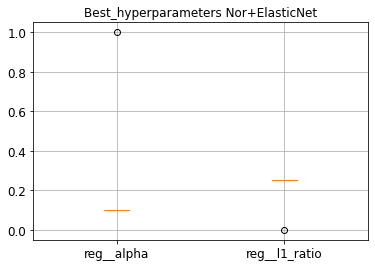

Modes=  [0.1  0.25]


In [ ]:
from scipy.stats import mode
from datetime import date

r = 1 #hyperparameters model 1
nh = len(best_hyperpar[0][r])
hyperpar_r = np.zeros((Niter,nh)) 
for i in range(Niter):
  for j in range(nh):
    hyperpar_r[i,j] = best_hyperpar[i][r].get(list(best_hyperpar[i][r].keys())[j])
    
    
#revisar numero entero para realizar casting
aa = list(best_hyperpar[0][r].keys())
c = -1
for i in range(len(aa)):
    if aa[i].find('n_neighbors') > -1:
      c = i

plt.boxplot(hyperpar_r)
plt.xticks(ticks=np.arange(nh)+1,labels=list(best_hyperpar[0][r].keys()))
plt.title('Best_hyperparameters '+label_model[r])
plt.grid()
plt.show()

mode_hyper = mode(hyperpar_r,axis=0)[0][0]
print("Modes= ", mode_hyper)
#plt.savefig('results/hyperpar.pdf', format='pdf', dpi=300)

# Modelo definitivo

In [ ]:
r = 1 #camino elastic net
steps_final = [('scaler',StandardScaler()),
               ('reg',ElasticNet(alpha=0.01,l1_ratio=0))]  
         
modelo_final = Pipeline(steps_final)
modelo_final.fit(Xtrain_pre,ytrain)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reg',
                 ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True,
                            l1_ratio=0, max_iter=1000, normalize=False,
                            positive=False, precompute=False, random_state=None,
                            selection='cyclic', tol=0.0001,
                            warm_start=False))],
         verbose=False)

In [ ]:
ytest_e = modelo_final.predict(dummy.transform(Xtest)) #simular casos nuevos

In [ ]:
print('MAE_test=', msa(ytest,ytest_e))


MAE_test= 0.16761455775200232


In [ ]:
pathpre = 'resultados'

try:
  os.mkdir(pathpre)
except:
  print("Carpeta results ya existe")

In [ ]:
import shutil
from joblib import dump, load
from datetime import date, datetime
from google.colab import files

modelo_final = {'modelo':modelo_final,
          'pasos':label_model[1],
          'mae_test':msa(ytest,ytest_e),
            } 

dump(modelo_final,'resultados/modelo_final.joblib')
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'__modelo'
shutil.make_archive(namefile, 'zip', 'resultados')
files.download(namefile+'.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>